In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()
#df['stroke'].value_counts()
#df['hypertension'].value_counts()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.drop(columns=['id'], inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X = df.drop('stroke', axis=1)
y = df['stroke']

np.random.seed(42)
X_synth = X.sample(n=500, replace=True).copy()
noise = np.random.normal(0, 0.01, X_synth.shape)
X_synth += noise

y_synth = y[X_synth.index].reset_index(drop=True)
X_synth = pd.DataFrame(X_synth, columns=X.columns).reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_synth_scaled = scaler.transform(X_synth)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)

y_pred = clf.predict(X_synth_scaled)

print("Evaluation on synthetic data:")
print(classification_report(y_synth, y_pred))

Evaluation on synthetic data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       0.95      0.91      0.93        22

    accuracy                           0.99       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.99      0.99      0.99       500



C:\Users\User\AppData\Local\Temp\ipykernel_24300\2791319009.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_24300\895512599.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

avg_glucose_level: 0.2849
bmi: 0.2344
age: 0.2325
smoking_status: 0.0676
work_type: 0.0495
gender: 0.0341
Residence_type: 0.0312
hypertension: 0.0245
heart_disease: 0.0222
ever_married: 0.0191


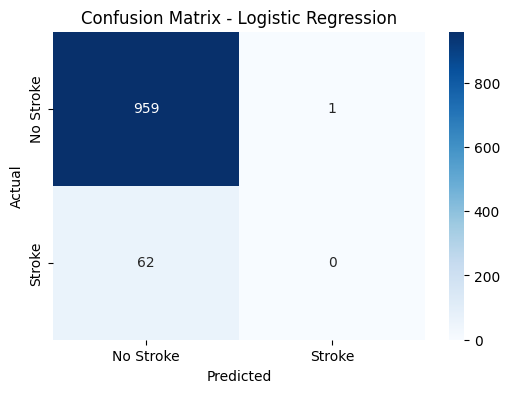

In [60]:
from xgboost import XGBClassifier
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("RandomForestClassifier:\n", classification_report(y_test, y_pred))

#Kiértékelés
feature_names = X.columns  
importances = rfc.feature_importances_

for name, importances in sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {importances:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_24300\738826630.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       960
           1       0.20      0.24      0.22        62

    accuracy                           0.89      1022
   macro avg       0.57      0.59      0.58      1022
weighted avg       0.90      0.89      0.90      1022

age: 0.2883
age_bmi: 0.2513
avg_glucose_level: 0.1290
bmi: 0.1214
work_type: 0.0668
smoking_status: 0.0424
Residence_type: 0.0350
gender: 0.0305
ever_married: 0.0216
hypertension: 0.0136


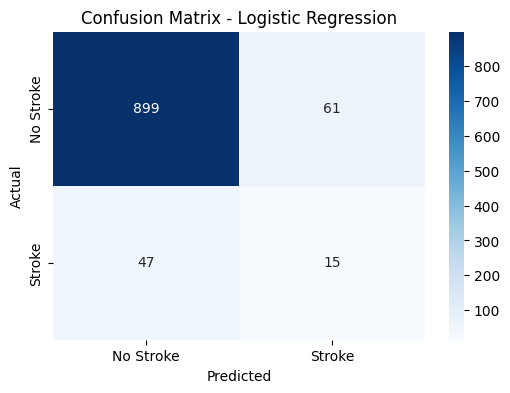

: 

In [ ]:
from imblearn.over_sampling import SMOTE
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)
df.drop(['heart_disease'],axis=1,inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

df['age_bmi'] = df['age'] * df['bmi']

#df['ht_hd'] = df['hypertension'] * df['heart_disease']

#scaler = StandardScaler()
#df[['age', 'bmi', 'age_bmi']] = scaler.fit_transform(df[['age', 'bmi', 'age_bmi']])


X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled,y_train_resampled)

y_pred=rfc.predict(X_test)
print("RandomForestClassifier:\n", classification_report(y_test, y_pred))

#Kiértékelés
feature_names = X.columns  
importances = rfc.feature_importances_

for name, importances in sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {importances:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
#1 lineáris regresszió
#2 logisztikus regresszió
#3 lineáris regresszió több váétozóval
#4 regularizáció
#5 NN felépítes (forward path)
#6 NN tanítás (back propagation)
#7 SVM
#8 klaszterezés
#9 Anomália
#10 ajánló rendszer
#11 Bias variance

C:\Users\User\AppData\Local\Temp\ipykernel_14196\2667813440.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.40      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.68      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022

